In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [79]:
# Load the Titanic dataset
data = pd.read_csv('Titanic.csv')

In [80]:
# Select relevant columns for the analysis
data = data[['Age', 'Fare', 'Survived']]

In [81]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
data[['Age', 'Fare']] = imputer.fit_transform(data[['Age', 'Fare']])

In [82]:
# Handle missing values
data.dropna(subset=['Age', 'Fare'], inplace=True)

In [84]:
# Create separate DataFrames for passengers who survived and did not survive
survived = data[data['Survived'] == 1]
not_survived = data[data['Survived'] == 0]

In [85]:
# Standardize the data (important for k-means)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


In [86]:
# Perform k-means clustering with an explicit value of n_init
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(data_scaled)

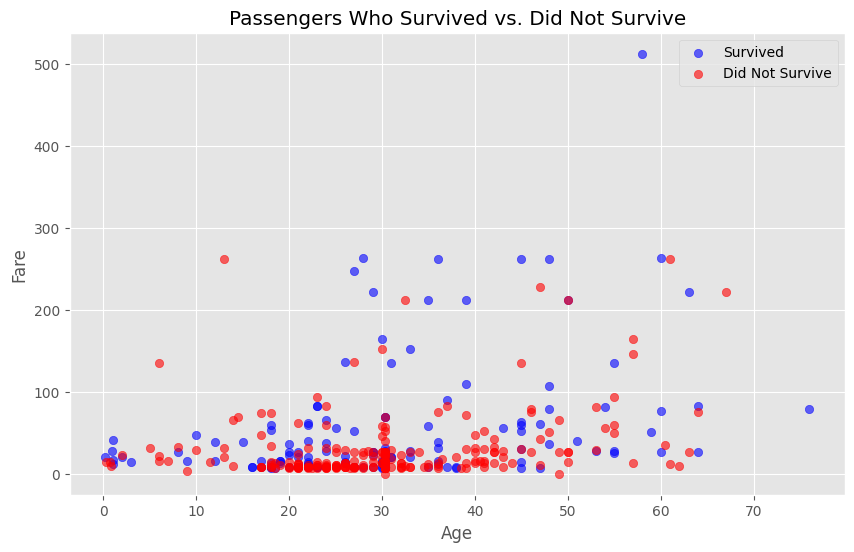

In [87]:
# Create a scatter plot to visualize passengers who survived and did not survive
plt.figure(figsize=(10, 6))
plt.scatter(survived['Age'], survived['Fare'], c='blue', label='Survived', alpha=0.6)
plt.scatter(not_survived['Age'], not_survived['Fare'], c='red', label='Did Not Survive', alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Passengers Who Survived vs. Did Not Survive')
plt.legend()
plt.grid(True)
plt.show()